In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import fileio

path = r"/home/milky/drosophila-SNA/data/results/local_measures_snapshots/120_sec_window/"
all_treatments = fileio.load_multiple_folders(path)

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_multiple_folders(treatment_path)
    treatment_dataframes = []
    for group_name, group_path in all_groups.items():
        all_snapshots = fileio.load_files_from_folder(group_path)
        group_dataframes = []  # Create a list to store DataFrames for each group
        for snapshot_name, snapshot_path in all_snapshots.items():
            df = pd.read_csv(snapshot_path, index_col=0) 
            df['Snapshot'] = snapshot_name.replace('.csv', '')
            df['Group'] = group_name
            group_dataframes.append(df)  # Append the DataFrame to the list for the group
        group_combined_df = pd.concat(group_dataframes)  # Combine DataFrames for the group
        treatment_dataframes.append(group_combined_df)  # Append the combined DataFrame to the list

    combined_df = pd.concat(treatment_dataframes)
    combined_df = combined_df.set_index(['Group'], append=True)
    combined_df.index.names = ['Fly', 'Group']
    combined_df = combined_df.reorder_levels(['Fly', 'Group'])
    combined_df['Treatment'] = treatment_name
    combined_df = combined_df.set_index('Treatment', append=True)
    dataframes.append(combined_df)

combined_data = pd.concat(dataframes)

<Figure size 800x400 with 0 Axes>

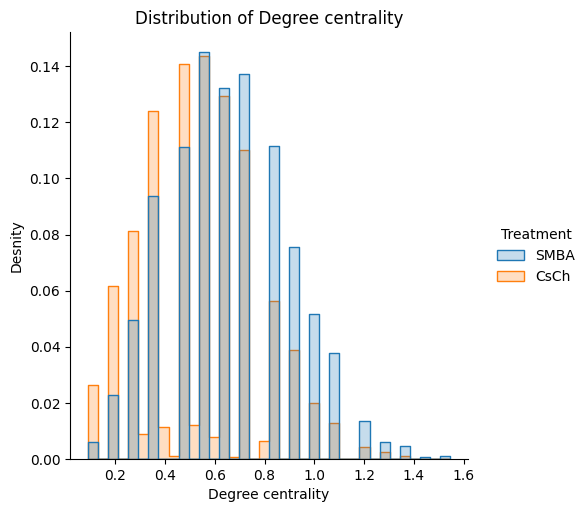

<Figure size 800x400 with 0 Axes>

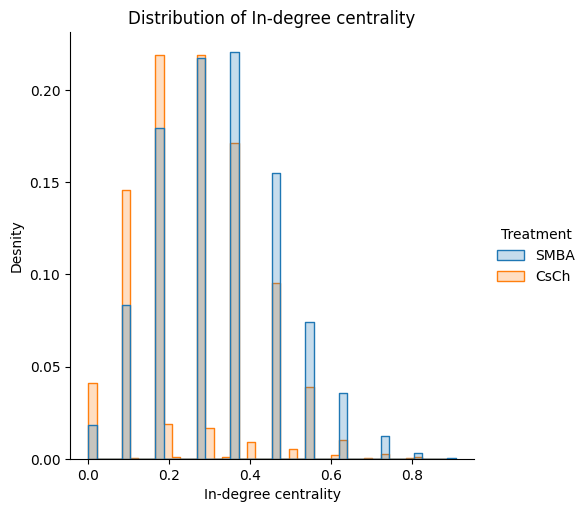

<Figure size 800x400 with 0 Axes>

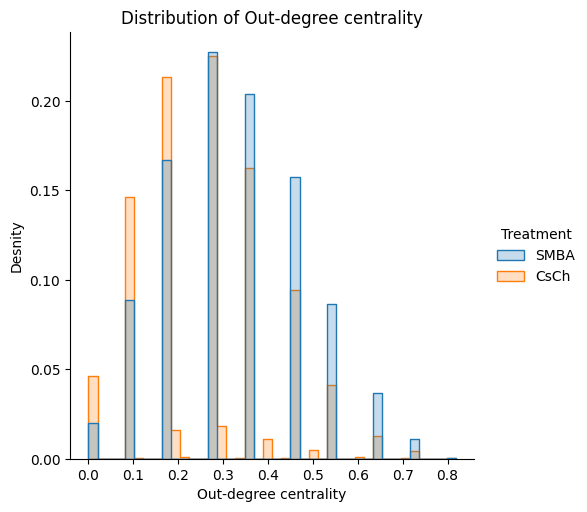

<Figure size 800x400 with 0 Axes>

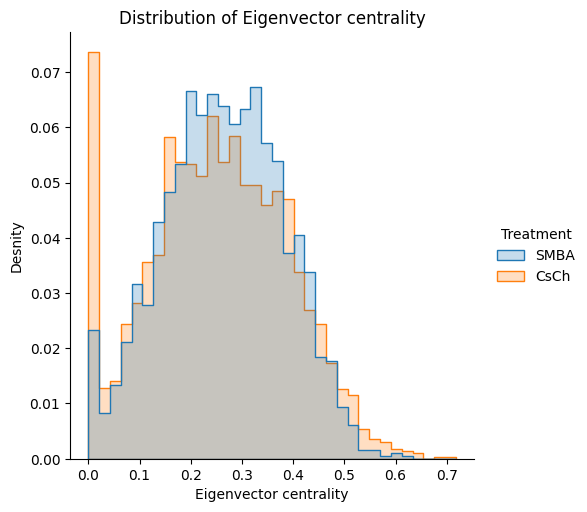

<Figure size 800x400 with 0 Axes>

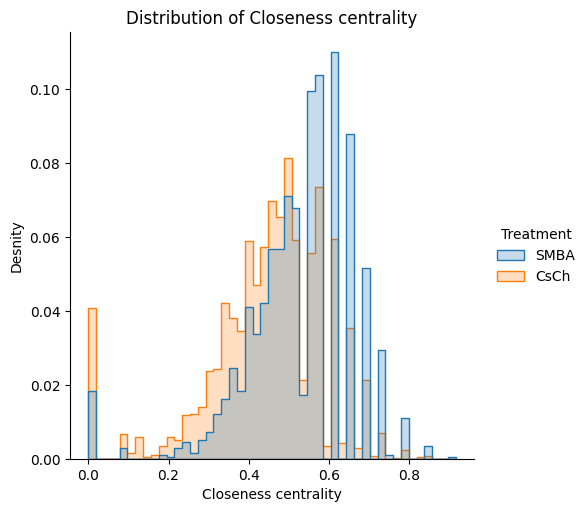

<Figure size 800x400 with 0 Axes>

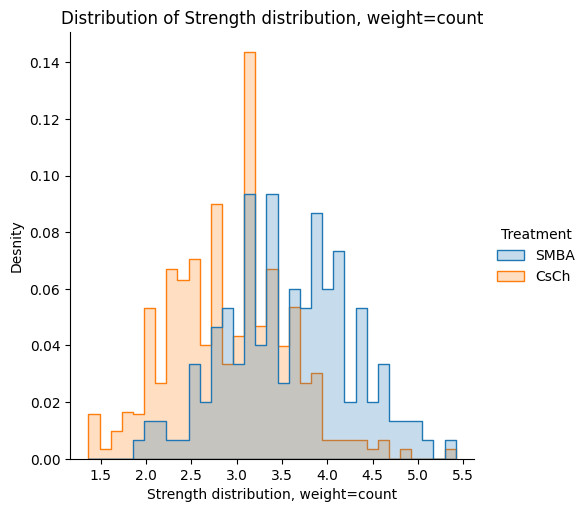

<Figure size 800x400 with 0 Axes>

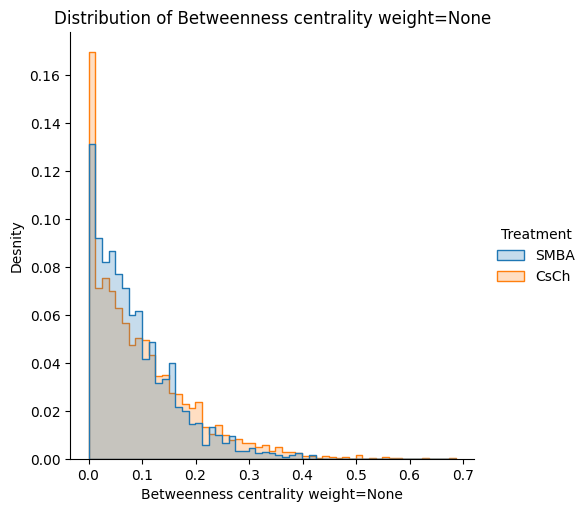

<Figure size 800x400 with 0 Axes>

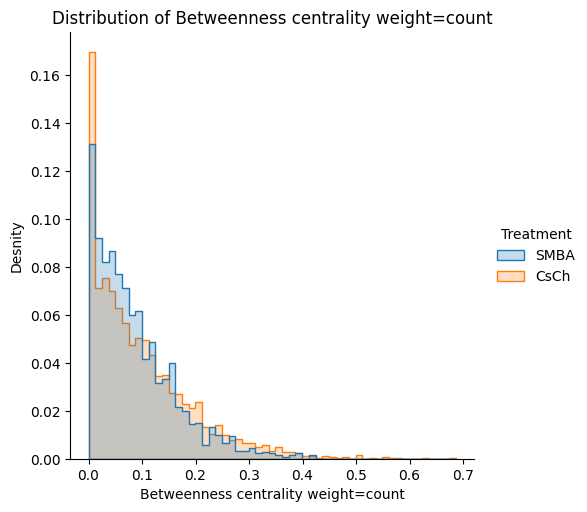

<Figure size 800x400 with 0 Axes>

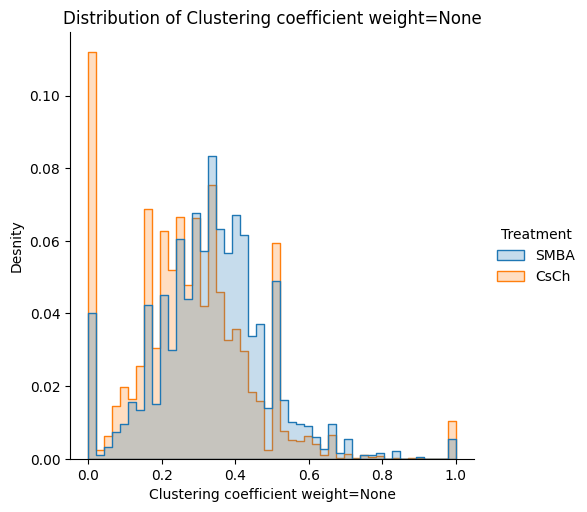

<Figure size 800x400 with 0 Axes>

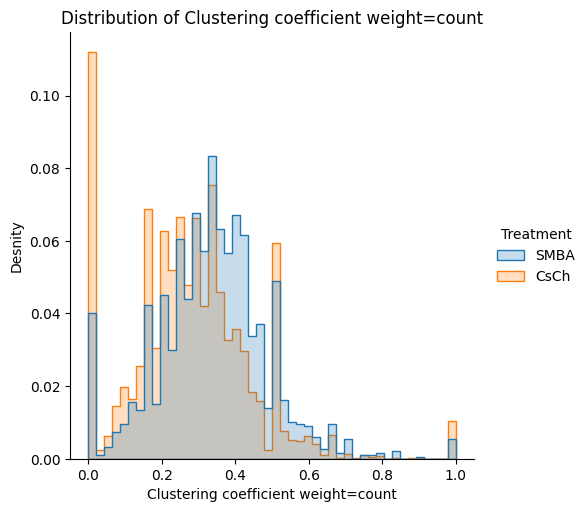

<Figure size 800x400 with 0 Axes>

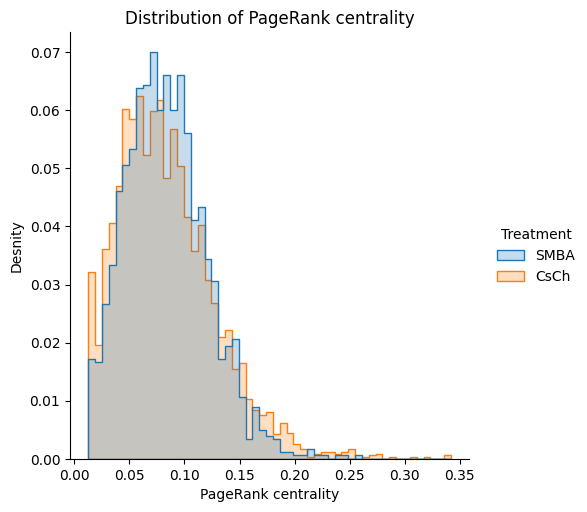

<Figure size 800x400 with 0 Axes>

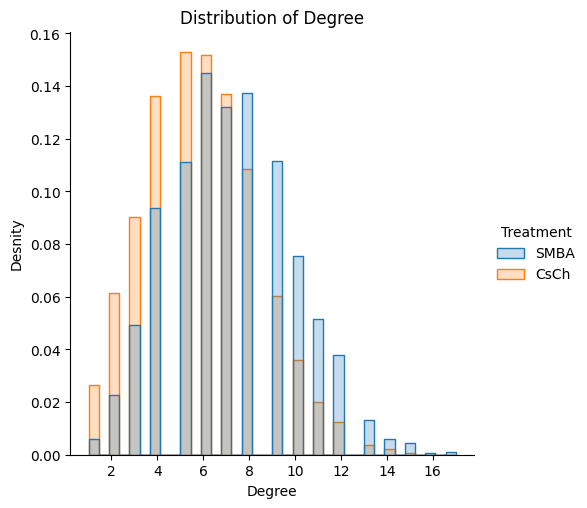

<Figure size 800x400 with 0 Axes>

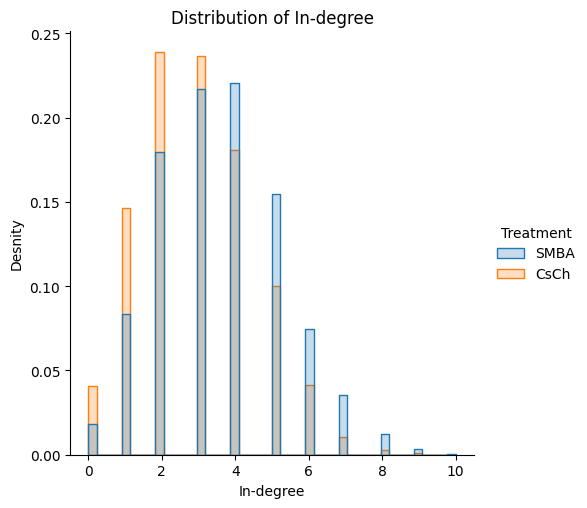

<Figure size 800x400 with 0 Axes>

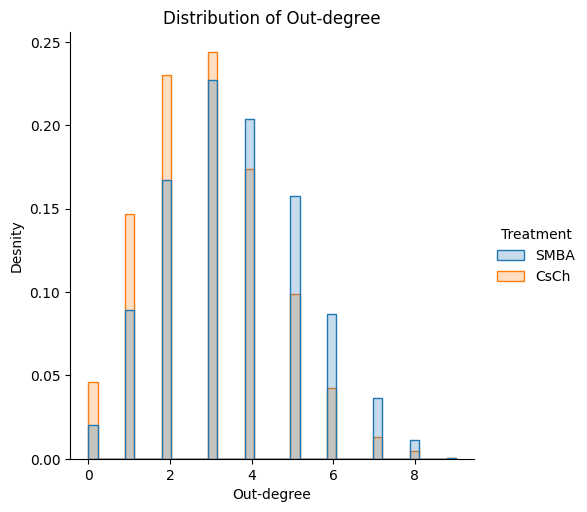

<Figure size 800x400 with 0 Axes>

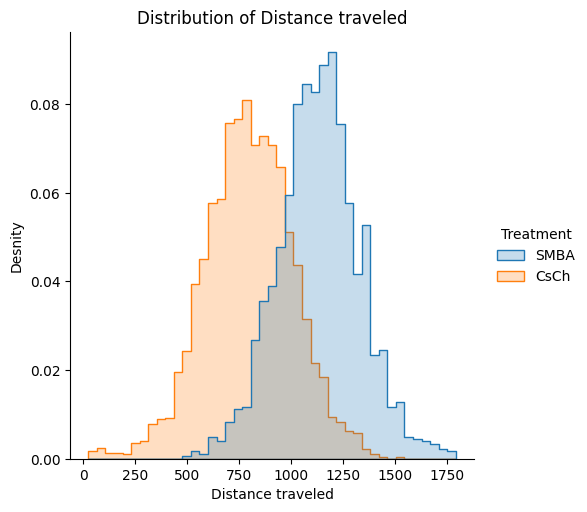

<Figure size 800x400 with 0 Axes>

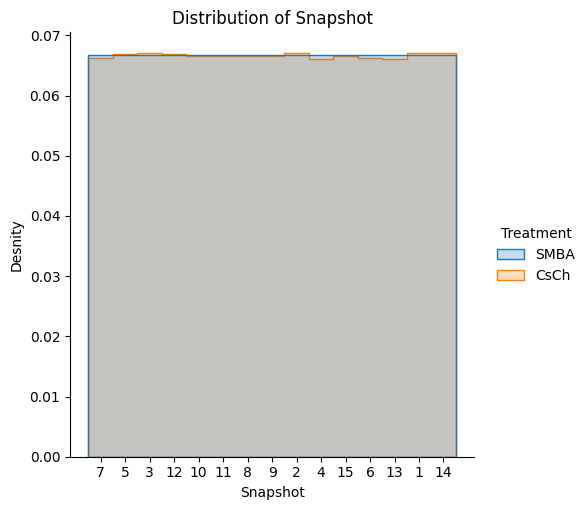

In [4]:
for measure_name in combined_data.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(combined_data, x=measure_name, hue="Treatment",
                stat="probability", common_norm=False, element="step")  # element="step"
    plt.xlabel(measure_name)
    plt.ylabel('Desnity')
    plt.title(f'Distribution of {measure_name}')
    plt.show()

In [5]:
combined_data.columns

Index(['Degree centrality', 'In-degree centrality', 'Out-degree centrality',
       'Eigenvector centrality', 'Closeness centrality',
       'Strength distribution, weight=count',
       'Betweenness centrality weight=None',
       'Betweenness centrality weight=count',
       'Clustering coefficient weight=None',
       'Clustering coefficient weight=count', 'PageRank centrality', 'Degree',
       'In-degree', 'Out-degree', 'Distance traveled', 'Snapshot'],
      dtype='object')